In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('dataset.csv')
df=df.drop(columns=['DISTRITO','UBIGEO','DEPARTAMENTO','PROVINCIA','FECHA_CORTE','CODIGO','NUMMUL','INTERES','GASTOS','COSTAS','DESCUENTO','TOTAL','FECHAPROYECCION'])#deshacer columnas que no son de interés
missing_data = df.isnull().sum()
missing_percentage = df.isnull().mean() * 100
print("Valores faltantes por columna:")
print(missing_data)
print("\nPorcentaje de valores faltantes por columna:")
print(missing_percentage)

Valores faltantes por columna:
ANIOMULTA       0
ZONA            0
FECHAMULTA      0
FECHASISTEMA    0
ESTADO          0
CODIGODEGIRO    0
GIRO            0
CODIGOMULTA     0
DESCRIPCION     0
MONTO           0
dtype: int64

Porcentaje de valores faltantes por columna:
ANIOMULTA       0.0
ZONA            0.0
FECHAMULTA      0.0
FECHASISTEMA    0.0
ESTADO          0.0
CODIGODEGIRO    0.0
GIRO            0.0
CODIGOMULTA     0.0
DESCRIPCION     0.0
MONTO           0.0
dtype: float64


In [2]:
df=df.sort_values(by=['ESTADO','ZONA'])
df['ESTADO'].value_counts()

,count
ESTADO,
P,31210
A,22296


<Axes: xlabel='ZONA'>

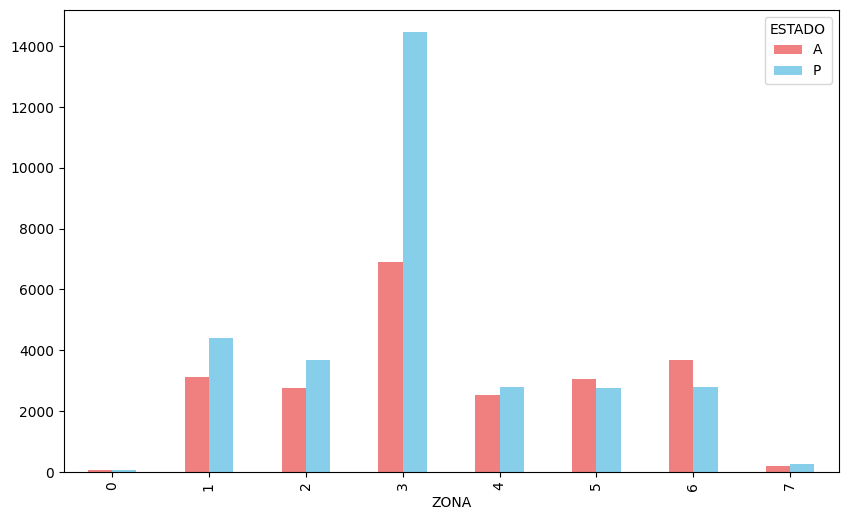

In [3]:
conteo_por_zona = df.groupby(['ZONA', 'ESTADO']).size().unstack(fill_value=0)
conteo_por_zona.plot(kind='bar', figsize=(10, 6), color=['lightcoral','skyblue'])

In [4]:
df

,ANIOMULTA,ZONA,FECHAMULTA,FECHASISTEMA,ESTADO,CODIGODEGIRO,GIRO,CODIGOMULTA,DESCRIPCION,MONTO
259,2018,0,20180104,20180125,A,0,SIN GIRO DETERMINADO,9041,"POR USAR, DESTRUIR, VENDER, DISPONER, ÁREAS DE...",41500.0
893,2018,0,20180228,20180312,A,14,CONSTRUCCION,5026,POR CONSTRUIR Y/O CERCAR ÁREAS DE USO PÚBLICO ...,20750.0
1950,2022,0,20220610,20220621,A,0,SIN GIRO DETERMINADO,2028,Por carecer de tapa los recipientes de basura.,176.0
1981,2023,0,20230203,20230320,A,0,SIN GIRO DETERMINADO,1228,"Por no usar mandil, gorro, guantes en el expen...",138.0
2079,2022,0,20220218,20220324,A,0,NO REGISTRA,8041,"Por USAR, DESTRUIR, VENDER, DISPONER, áreas de...",23000.0
...,...,...,...,...,...,...,...,...,...,...
52977,2023,7,20230317,20230317,P,40,RESTAURANTE,5002,Por no cumplir con las condiciones técnicas y/...,9900.0
53160,2019,7,20190530,20190531,P,312,COMERCIO INFORMAL,8023,Por ejercer el comercio ambulatorio en áreas v...,210.0
53221,2019,7,20190311,20190311,P,312,COMERCIO INFORMAL,8023,Por ejercer el comercio ambulatorio en áreas v...,420.0
53229,2023,7,20231218,20231218,P,990,RESTAURANTE CON VTA DE LICOR COMO COMPLEMENTO,5020,Por carecer de certificado de inspección técni...,1732.5


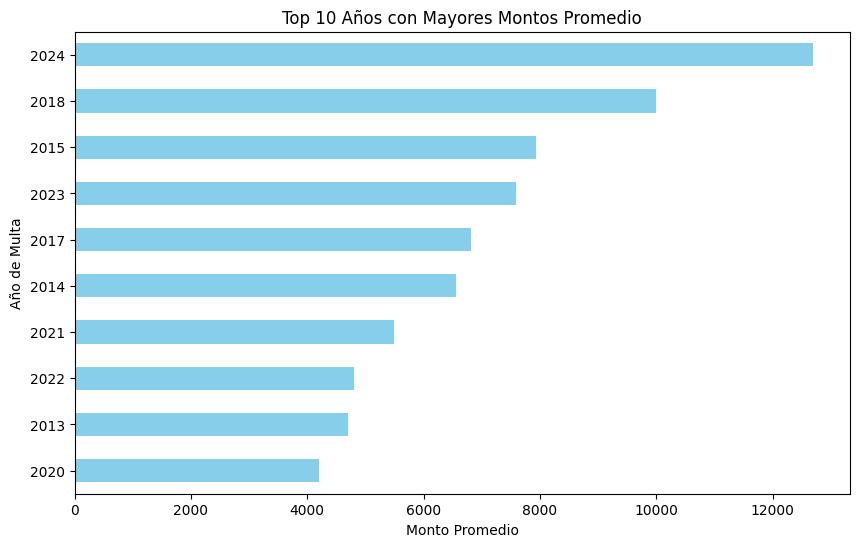

In [5]:
#GRAFICO DE ANIOMULTA Y MONTO
mean_monto_by_year = df.groupby('ANIOMULTA')['MONTO'].mean()


top_10_years = mean_monto_by_year.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_years.plot(kind='barh', color='skyblue')
plt.title("Top 10 Años con Mayores Montos Promedio")
plt.xlabel("Monto Promedio")
plt.ylabel("Año de Multa")
plt.gca().invert_yaxis()
plt.show()

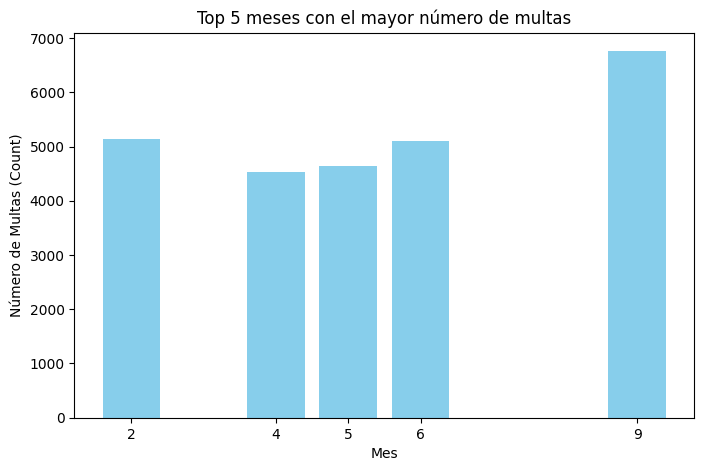

In [6]:
df['mes'] = df['FECHAMULTA'].astype(str).str[4:6].astype(int)
df_values=df[['mes','MONTO']].groupby('mes').agg('count')
df_sorted = df_values.sort_values(by='MONTO', ascending=False)

# 4. Seleccionar los 5 meses con los counts más altos
df_top_5 = df_sorted.head(5)

# 5. Graficar
plt.figure(figsize=(8, 5))
plt.bar(df_top_5.index, df_top_5['MONTO'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Número de Multas (Count)')
plt.title('Top 5 meses con el mayor número de multas')
plt.xticks(df_top_5.index)  # Asegura que las etiquetas del eje X estén correctamente
plt.show()



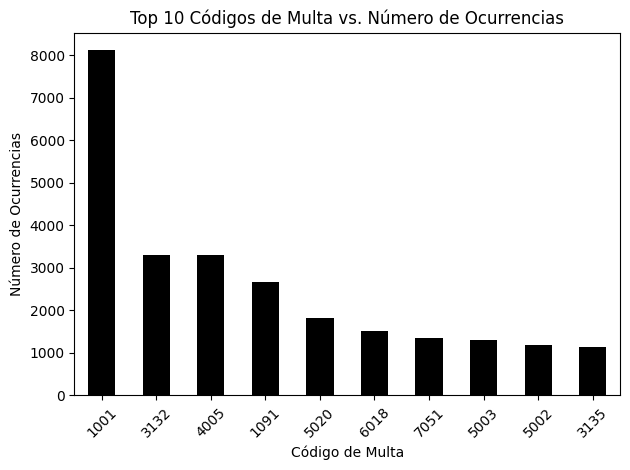

In [7]:
df_multa=df['CODIGOMULTA'].value_counts()
df_top_10_multa = df_multa.head(10)
df_top_10_multa.plot(kind='bar', color='black')
plt.title('Top 10 Códigos de Multa vs. Número de Ocurrencias')
plt.xlabel('Código de Multa')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor visibilidad
plt.tight_layout()

In [19]:
df_multa =df["CODIGOMULTA"].value_counts()
df_multa

,count
CODIGOMULTA,
1001,8116
3132,3300
4005,3290
1091,2658
5020,1811
...,...
6074,1
3060,1
8003,1


In [20]:
df_top_10_multa=df_multa.head(10)

In [24]:
df_top_10_multa

,count
CODIGOMULTA,
1001,8116
3132,3300
4005,3290
1091,2658
5020,1811
6018,1503
7051,1349
5003,1290
5002,1191


In [29]:
df

,ANIOMULTA,ZONA,FECHAMULTA,FECHASISTEMA,ESTADO,CODIGODEGIRO,GIRO,CODIGOMULTA,DESCRIPCION,MONTO,mes
259,2018,0,20180104,20180125,A,0,SIN GIRO DETERMINADO,9041,"POR USAR, DESTRUIR, VENDER, DISPONER, ÁREAS DE...",41500.0,1
893,2018,0,20180228,20180312,A,14,CONSTRUCCION,5026,POR CONSTRUIR Y/O CERCAR ÁREAS DE USO PÚBLICO ...,20750.0,2
1950,2022,0,20220610,20220621,A,0,SIN GIRO DETERMINADO,2028,Por carecer de tapa los recipientes de basura.,176.0,6
1981,2023,0,20230203,20230320,A,0,SIN GIRO DETERMINADO,1228,"Por no usar mandil, gorro, guantes en el expen...",138.0,2
2079,2022,0,20220218,20220324,A,0,NO REGISTRA,8041,"Por USAR, DESTRUIR, VENDER, DISPONER, áreas de...",23000.0,2
...,...,...,...,...,...,...,...,...,...,...,...
52977,2023,7,20230317,20230317,P,40,RESTAURANTE,5002,Por no cumplir con las condiciones técnicas y/...,9900.0,3
53160,2019,7,20190530,20190531,P,312,COMERCIO INFORMAL,8023,Por ejercer el comercio ambulatorio en áreas v...,210.0,5
53221,2019,7,20190311,20190311,P,312,COMERCIO INFORMAL,8023,Por ejercer el comercio ambulatorio en áreas v...,420.0,3
53229,2023,7,20231218,20231218,P,990,RESTAURANTE CON VTA DE LICOR COMO COMPLEMENTO,5020,Por carecer de certificado de inspección técni...,1732.5,12


In [35]:
# Paso 1: Contar las ocurrencias de cada "CODIGOMULTA" y seleccionar los 10 más frecuentes
top_10_codigos_freq = df['CODIGOMULTA'].value_counts().head(10)

# Paso 2: Filtrar las filas donde "CODIGOMULTA" esté entre los más frecuentes
top_10_df = df[df['CODIGOMULTA'].isin(top_10_codigos_freq.index)]

# Paso 3: Eliminar duplicados y crear una copia explícita
top_10_unicos = top_10_df.drop_duplicates(subset='CODIGOMULTA', keep='first').copy()

# Paso 4: Agregar la frecuencia como columna auxiliar
top_10_unicos.loc[:, 'FRECUENCIA'] = top_10_unicos['CODIGOMULTA'].map(top_10_codigos_freq)

# Paso 5: Ordenar el DataFrame por frecuencia (descendente)
resultado = top_10_unicos.sort_values(by='FRECUENCIA', ascending=False)[['CODIGOMULTA', 'DESCRIPCION']]

print(resultado)

      CODIGOMULTA                                        DESCRIPCION
35844        1001  Por carecer de Licencia o Autorización de Func...
38241        3132  POR ESTACIONAR VEHÍCULOS MOTORIZADOS O NO MOTO...
6            4005  POR CARECER DE CONSTANCIA DE SEGURIDAD BÁSICA ...
8130         1091  POR EJERCER EL COMERCIO EN LA VÍA PUBLICA SIN ...
19110        5020  Por carecer de certificado de inspección técni...
481          6018  POR CARECER DE CERTIFICADO DE INSPECCIÓN TÉCNI...
1845         7051  POR CONSTRUIR SIN LA LICENCIA RESPECTIVA DETEC...
501          5003  POR INSTALACIÓN DE TODO TIPO DE ANUNCIOS Y/O P...
143          5002  POR REALIZAR OBRAS DE EDIFICACIÓN E INSTALACIO...
244          3135  POR CIRCULAR VEHÍCULOS EN PISTAS NO AUTORIZADA...


In [41]:
# Recorrer el DataFrame "resultado" e imprimir cada fila
for index, row in resultado.iterrows():
    print(f"Código de Multa: {row['CODIGOMULTA']}")
    print(f"Descripción: {row['DESCRIPCION']}")
    print("-" * 50)  # Separador entre filas


Código de Multa: 1001
Descripción: Por carecer de Licencia o Autorización de Funcionamiento (No incluye grifos, discotecas, video pub, boites, disco bar, grills, club nocturno, cantinas y similares, prostíbulos).
--------------------------------------------------
Código de Multa: 3132
Descripción: POR ESTACIONAR VEHÍCULOS MOTORIZADOS O NO MOTORIZADOS EN ZONA RÍGIDA, ACERAS, JARDINES Y PARQUES
--------------------------------------------------
Código de Multa: 4005
Descripción: POR CARECER DE CONSTANCIA DE SEGURIDAD BÁSICA DE DEFENSA CIVIL
--------------------------------------------------
Código de Multa: 1091
Descripción: POR EJERCER EL COMERCIO EN LA VÍA PUBLICA SIN AUTORIZACIÓN
--------------------------------------------------
Código de Multa: 5020
Descripción: Por carecer de certificado de inspección técnica de seguridad en edificaciones Básica y/o a detalle.
--------------------------------------------------
Código de Multa: 6018
Descripción: POR CARECER DE CERTIFICADO DE INSPECC

## Modeling Part - Classification with XGBoost

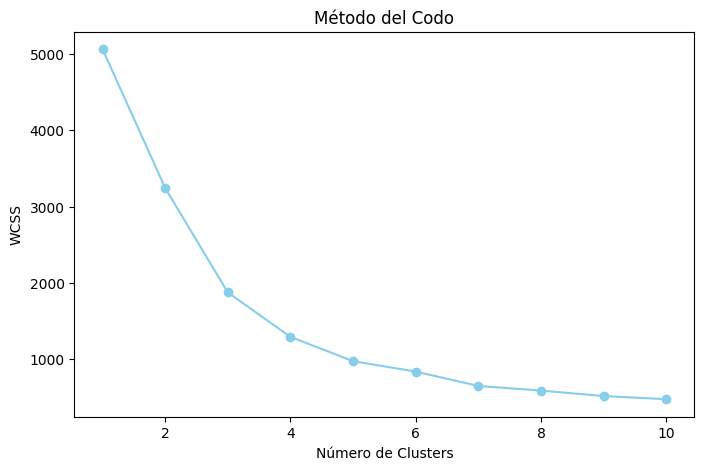

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import mutual_info_classif


# Transformar variables categóricas y normalizar numéricas
le = LabelEncoder()
df['ZONA'] = le.fit_transform(df['ZONA'])
scaler = MinMaxScaler()
df[['MONTO', 'ANIOMULTA', 'ZONA']] = scaler.fit_transform(df[['MONTO', 'ANIOMULTA', 'ZONA']])

# Método del codo para determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['MONTO', 'ANIOMULTA', 'ZONA']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', color='skyblue')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()





         ANIOMULTA      ZONA    FECHAMULTA  FECHASISTEMA  CODIGODEGIRO  \
Cluster                                                                  
0         0.593770  0.788077  2.013910e+07  2.014365e+07    137.524013   
1         0.714441  0.378817  2.016930e+07  2.017169e+07    355.397926   
2         0.322703  0.353347  2.007133e+07  2.007848e+07     47.355206   

            MONTO       mes  Cluster  
Cluster                               
0        0.000311  6.411419      0.0  
1        0.000192  6.345696      1.0  
2        0.000076  6.341718      2.0  


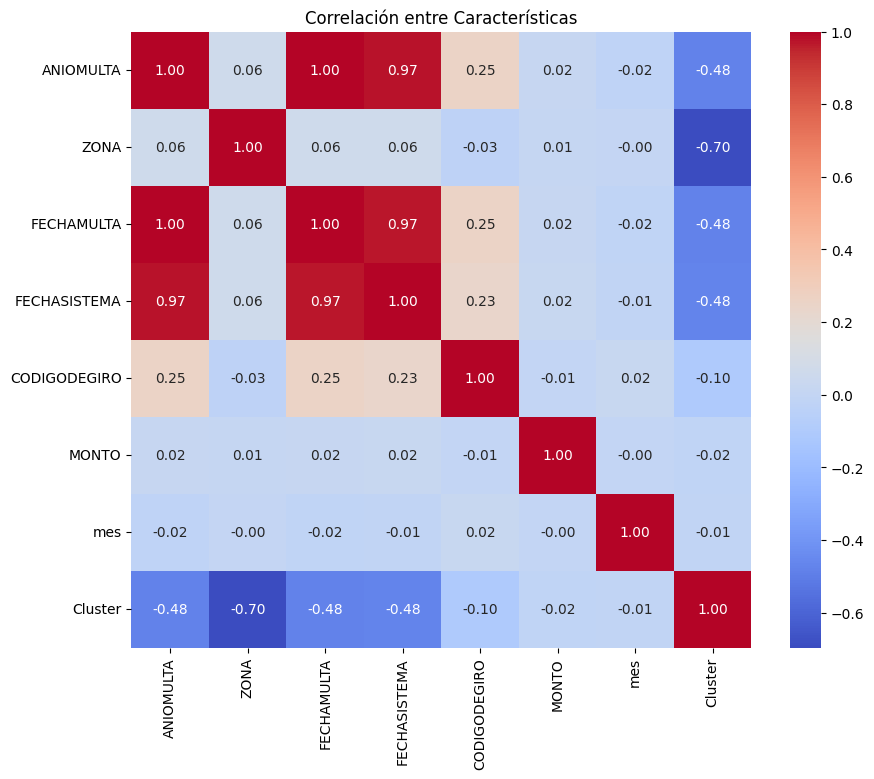

In [ ]:

# Aplicar KMeans con el número óptimo de clusters (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['MONTO', 'ANIOMULTA', 'ZONA']])  # Asignar etiquetas al dataframe

# Analizar patrones dentro de los clusters
# Seleccionar solo columnas numéricas para calcular el promedio
numeric_columns = df.select_dtypes(include=[np.number])
cluster_summary = numeric_columns.groupby(df['Cluster']).mean()

# Mostrar el resumen de los clusters
print(cluster_summary)

# Transformar ESTADO en variable binaria
df['ESTADO_BINARIO'] = df['ESTADO'].apply(lambda x: 1 if x == 'P' else 0)

# Correlaciones entre características
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre Características')
plt.show()





Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69      4398
           1       0.78      0.79      0.79      6235

    accuracy                           0.75     10633
   macro avg       0.74      0.74      0.74     10633
weighted avg       0.74      0.75      0.74     10633

Confusion Matrix:
 [[2976 1422]
 [1284 4951]]


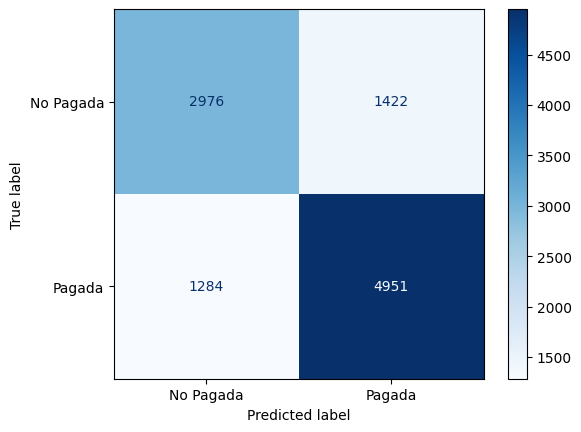

Accuracy Score: 0.7455092636132794
Cross-Validation Accuracy Scores: [0.73723314 0.74485094 0.74774266 0.74209932 0.74764861]
Mean CV Accuracy: 0.7439149344605367


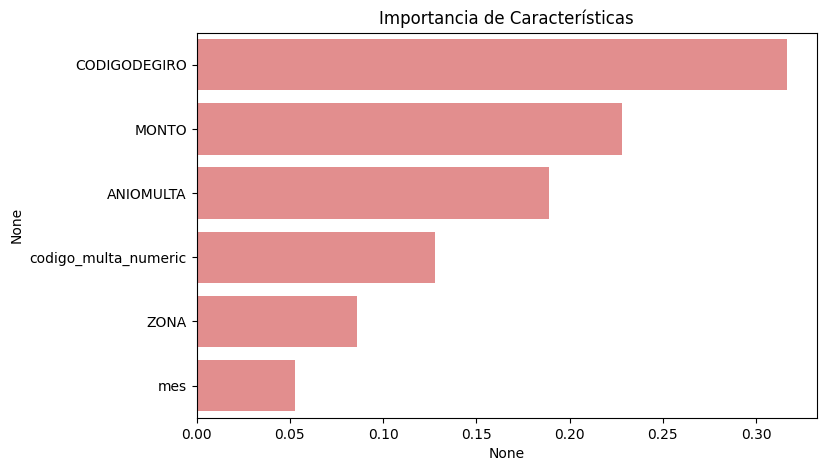


Información Mutua entre características y el target:
codigo_multa_numeric    0.147293
MONTO                   0.139836
CODIGODEGIRO            0.102332
ANIOMULTA               0.043507
ZONA                    0.018789
mes                     0.002152
dtype: float64


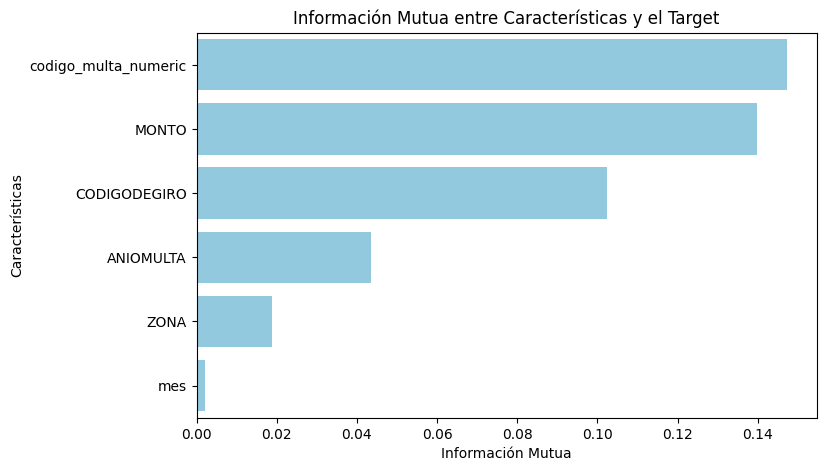

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# Codificar variables categóricas
df['codigo_multa_numeric'] = pd.to_numeric(df['CODIGOMULTA'], errors='coerce')

# Filtrar las filas donde 'codigo_multa_numeric' es NaN (es decir, eran datos no numéricos)
filas_no_numericas = df[df['codigo_multa_numeric'].isna()]
df = df.dropna(subset=['codigo_multa_numeric'])
#df = pd.get_dummies(df, columns=['CODIGOMULTA'], drop_first=True)
# Definir variables predictoras y objetivo
X = df[['MONTO', 'ANIOMULTA', 'ZONA', 'mes', 'CODIGODEGIRO','codigo_multa_numeric']]
y = df['ESTADO_BINARIO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Clasificación con Random Forest
#clf = RandomForestClassifier(random_state=42)
clf= xgb.XGBClassifier(eval_metric='logloss',  random_state=42)
clf.fit(X_train, y_train)


# Evaluación del modelo
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Pagada', 'Pagada'])
cm_display.plot(cmap='Blues')
plt.show()
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Análisis de importancia de características
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, color='lightcoral')
plt.title('Importancia de Características')
plt.show()

# Análisis adicional: Información mutua
mutual_info = mutual_info_classif(X, y, random_state=42)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
print("\nInformación Mutua entre características y el target:")
print(mutual_info_series)


# ... (código previo para calcular mutual_info_series) ...

# Gráfico de información mutua
plt.figure(figsize=(8, 5))
sns.barplot(x=mutual_info_series, y=mutual_info_series.index, color='skyblue')
plt.title('Información Mutua entre Características y el Target')
plt.xlabel('Información Mutua')
plt.ylabel('Características')
plt.show()

In [ ]:
#SERIALIZACION
import pickle
with open('clf.pkl', 'wb') as file:
    pickle.dump(clf, file)